## Multispecies coalescent in space and time

In [127]:
import ipcoal
import toytree
import toyplot, toyplot.svg
import pandas as pd


In [214]:
def sim_imb_fixed_t(ntips, height, nloci, nsites, coal, seed=123):
    """
    Return an ipcoal.Model object with genealogies simulated
    for 'nloci' and 'nsites' on an imbalanced 'tree' with Ne auto
    scaled so that all internal edges are 'coal' units long. 
    """
    # generate imbalanced tree
    tree = toytree.rtree.imbtree(ntips=ntips)
    
    # scale stem height 
    tree = tree.mod.node_scale_root_height(treeheight=height, include_stem=True)
    
    # get internode dist
    dist = tree.treenode.dist
    
    # get Ne by scaling coalunits by internode height
    Ne = dist / (coal * 2.)
    print(Ne)
    
    # init model and sim n unlinked genealogies
    model = ipcoal.Model(tree, Ne=Ne, seed=seed)
    model.sim_trees(nloci=nloci, nsites=nsites)
    return model

### 9 tip tree

In [219]:
seed = 9999
umodel = sim_imb_fixed_t(ntips=10, height=1e6, nloci=10, nsites=1, coal=0.2, seed=seed)
lmodel = sim_imb_fixed_t(ntips=10, height=1e6, nloci=1, nsites=1e5, coal=0.2, seed=seed)

249999.9999999999
249999.9999999999


#### Species tree

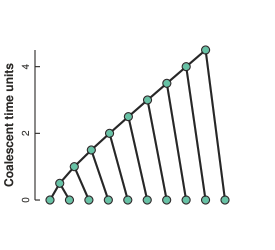

In [220]:
tre = umodel.tree.copy().mod.node_scale_root_height(0.5 * 10, include_stem=True)
canvas, axes = tre.draw(ts='c', width=275, padding=15)
axes.y.label.text = "Coalescent time units"
axes.y.ticks.locator = toyplot.locator.Integer(step=2)
toyplot.svg.render(canvas, "../manuscript/figures/fig-1a.svg")
canvas

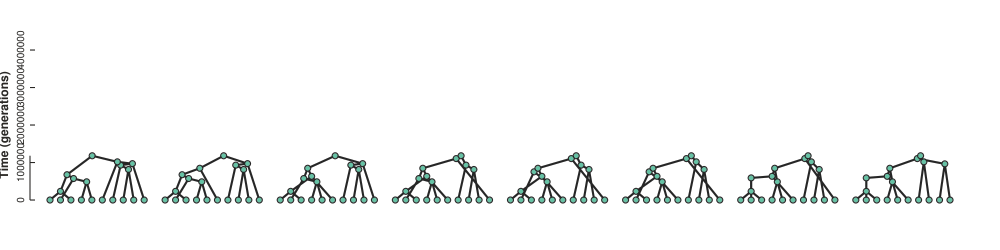

In [221]:
mtre = toytree.mtree(lmodel.df.genealogy[:10],)
canvas, axes = mtre.draw_tree_grid(
    ts='c', 
    shared_axis=True,
    fixed_order=tre.get_tip_labels(),
    height=250, 
    width=1000,
    nrows=1, 
    ncols=8,
    node_sizes=6,
);
axes.y.ticks.locator = toyplot.locator.Integer(step = int(1e6))
axes.y.domain.max = 4e6
axes.y.label.text = "Time (generations)"
#toyplot.svg.render(canvas, "../manuscript/figures/fig-1b.svg")
canvas

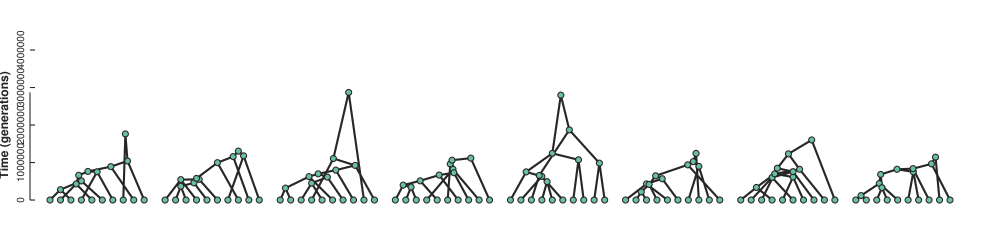

In [222]:
mtre = toytree.mtree(umodel.df.genealogy[:10],)
canvas, axes = mtre.draw_tree_grid(
    ts='c', 
    shared_axis=True,
    fixed_order=tre.get_tip_labels(),
    height=250, 
    width=1000,
    nrows=1, 
    ncols=8,
    node_sizes=6,
);
axes.y.ticks.locator = toyplot.locator.Integer(step = int(1e6))
axes.y.domain.max = 4e6
axes.y.label.text = "Time (generations)"
#toyplot.svg.render(canvas, "../manuscript/figures/fig-1c.svg")
canvas